In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import myivp as mi
from scipy.linalg import eigh_tridiagonal

In [2]:
def nr(x_i,f,f_d,tol,*args):
    for j in range(100):
        xn='invalid'
        if f_d(x_i,*args)!=0 and f_d(x_i,*args)>0 or f_d(x_i,*args)<0:
            xn=x_i-f(x_i,*args)/f_d(x_i,*args)
            if abs((xn-x_i)/x_i)<=tol:
                break
            else:
                 x_i=xn
    return xn

In [3]:
v0=64
fe=lambda z:np.tan(z)-np.sqrt((v0/(z)**2)-1) #transcendental eqn
f_de=lambda z:(1/np.cos(z))**2+(v0)/(z**3*np.sqrt((v0/(z)**2)-1))
x_1=1.2;x_2=4
z1=(nr(x_1,fe,f_de,0.000005)) #using newton raphson to find roots
z2=(nr(x_2,fe,f_de,0.000005))
z=[z1,z2]
def E(z):
    return -v0+z**2
En=[E(z1),E(z2)]
print("z:",z)
print('Energy:',En)

z: [1.3954661438718712, 4.164830914074382]
Energy: [-62.05267424130737, -46.65418345717035]


In [4]:
def even(xi):
    if xi>1:
        return F*np.exp(-Eps*xi)
    if 0<xi<1:
        return C*np.cos(Beta*xi)
    if xi<0:
        return even(-xi)
xx=np.linspace(-5,5,400)

In [5]:
v00=[4,16,25,49,64]
guesses=[[1],[1.2,3.6],[1.3,4],[1.3,4,6.5],[1.4,4.1,6.8]]
Ener=[]
f=lambda z,v0:np.tan(z)-np.sqrt((v0/(z)**2)-1)
f_d=lambda z,v0:(1/np.cos(z))**2+np.sqrt(v0)/(z**3*np.sqrt((v0/(z)**2)-1))
for i in range(len(v00)):
    tt=[]
    for j in (guesses[i]):
        t=nr(j,f,f_d,0.00005,v00[i])
        tt.append(t)
    Ener.append(tt)
print(Ener)

[[1.029861951488316], [1.252350642182893, 3.595270553690736], [1.3064352377699051, 3.8374538345418925], [1.3733269602199794, 4.0886390787991225, 6.616048385540692], [1.3954618107966965, 4.164834011662889, 6.830686174531622]]


In [6]:
EN=[]
for i in range(5):
    gg=[]
    def EE(z,v):
        return -v+z**2
    for j in Ener[i]:
        y=EE(j,v00[i])
        gg.append(y)
    EN.append(gg)
print(EN)

[[-2.9393843608766774], [-14.431617869024096, -3.0740296457643073], [-23.293226969513093, -10.273948067759726], [-47.11397306033295, -32.283030483316665, -5.227903760184404], [-62.052686334608005, -46.654157655296004, -17.341726385062557]]


<IPython.core.display.Javascript object>


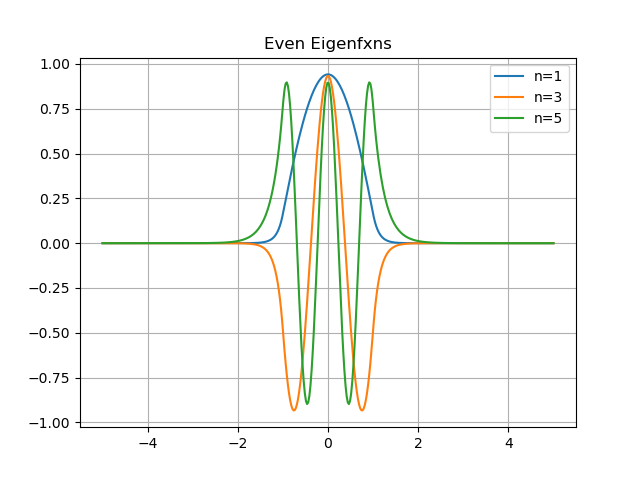

Text(0.5, 1.0, 'Even Eigenfxns')

In [7]:
plt.figure()
n=[1,3,5]
v0=64
Analytic=np.zeros((5,400))
for j in range(len(EN[4])):
    Sol_e=[]
    for i in range(len(xx)):
        Beta=np.sqrt((EN[4][j]+v0))
        Eps=Beta*np.tan(Beta)
        F=np.exp(Eps)*np.cos(Beta)/(np.sqrt(1+1/Eps))
        C=1/(np.sqrt(1+1/Eps))
        Sol_e.append(even(xx[i]))
        Analytic[n[j]-1,i]=even(xx[i])
    plt.plot(xx,Sol_e,label='n='+str(n[j]))
plt.grid();plt.legend()
plt.title('Even Eigenfxns')

In [8]:
fo=lambda z:1/np.tan(z)+np.sqrt((v0/(z)**2)-1) #transcendental eqn
f_do=lambda z:-(1/np.sin(z))**2+(v0)/(z**3*np.sqrt((v0/(z)**2)-1))
x_1=3;x_2=5.5
z1=(nr(x_1,fo,f_do,0.000005)) #using newton raphson to find roots
z2=(nr(x_2,fo,f_do,0.000005))
z=[z1,z2]

En=[E(z1),E(z2)]
print("z:",z)
print('Energy:',En)

z: [2.785903418736625, 5.521442707354411]
Energy: [-56.23874214147158, -33.513670429402794]


In [9]:
def odd(xi):
    if xi>1:
        return E1*np.exp(-Eps1*xi)
    if 0<xi<1:
        return D1*np.sin(Beta1*xi)
    if xi<0:
        return -odd(-xi)

<IPython.core.display.Javascript object>


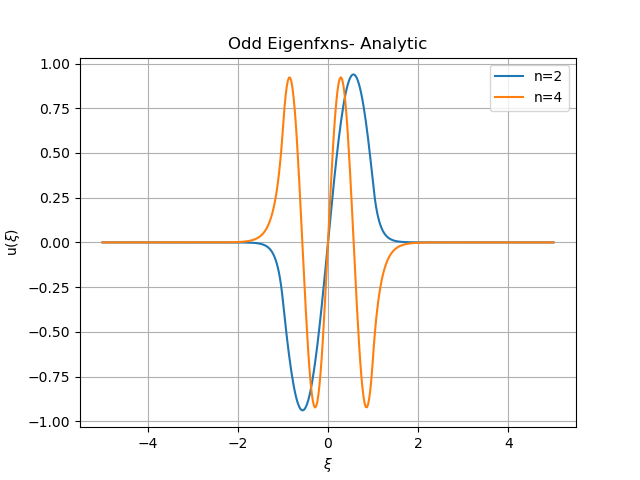

Text(0.5, 1.0, 'Odd Eigenfxns- Analytic')

In [10]:
plt.figure()
xx1=np.linspace(-5,5,400)
n1=[2,4]
for j in range(2):
    Sol_o=[]
    for i in range(len(xx1)):
        Beta1=np.sqrt((En[j]+v0))
        Eps1=np.sqrt(-En[j])
        E1=np.exp(Eps1)*np.sin(Beta1)/(np.sqrt(1+1/Eps1))
        D1=1/(np.sqrt(1+1/Eps1))
        Sol_o.append(odd(xx1[i]))
        Analytic[n[j],i]=odd(xx1[i])
    plt.plot(xx1,Sol_o,label='n='+str(n1[j]))
plt.grid();plt.legend()
plt.xlabel(r'$\xi$');plt.ylabel(r'u($ \xi $)')
plt.title('Odd Eigenfxns- Analytic')

In [11]:
#Using finite difference Method
n0=500 #n is the number of internal grid points
a=-5;b=5;v0=-64
x=np.linspace(a,b,n0)
def v(i):
    if -1<=i<=1:
        return v0
    if i>1 or -1>i:
        return 0
h=x[1]-x[0] #step size
diag=[]
for i in range(n0):
    diag.append(2/(h**2)+v(x[i]))
non_diag=[1/(-h**2)]*(n0-1) #non-diag elements
w, v = eigh_tridiagonal(diag, non_diag) #w=eigenvalue, v=eigenvector
print('The first 10 eigenvalues are: ')
w_10=w[:10]; print(w_10) #first 10 eigenvalues

The first 10 eigenvalues are: 
[-62.06104992 -56.27300994 -46.7337022  -33.65895011 -17.5665603
  -0.86385786   0.60340801   0.80290105   2.39658995   2.86333628]


In [12]:
def simp(array,a,b):
        n=len(array)
        simp_sum=array[0]+array[-1]
        for i in range (1,n):
            if i%2==0:
                simp_sum+=2*array[i]
            else:
    
                simp_sum+=4*array[i]
        simp_sum*=(b-a)/(3*(n))
        return simp_sum   
def normalization(u): #this function normalizes the eigenfunctions
    U=u**2
    L=u/np.sqrt(simp(U,a,b))
    return L

<IPython.core.display.Javascript object>


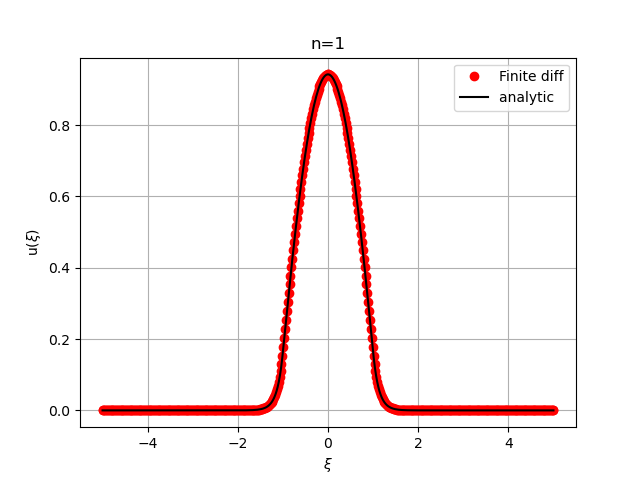

<IPython.core.display.Javascript object>


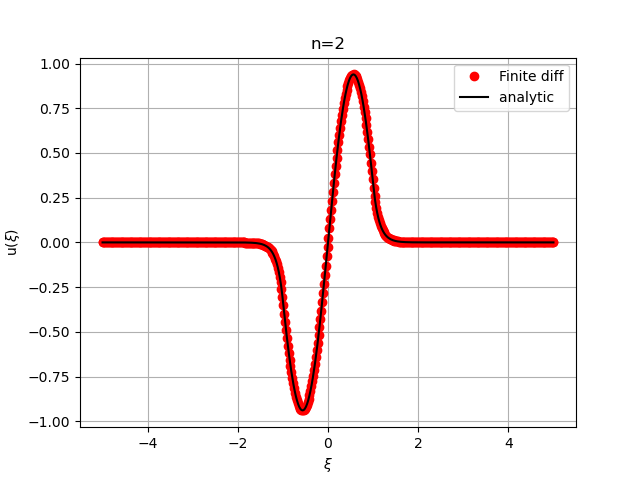

<IPython.core.display.Javascript object>


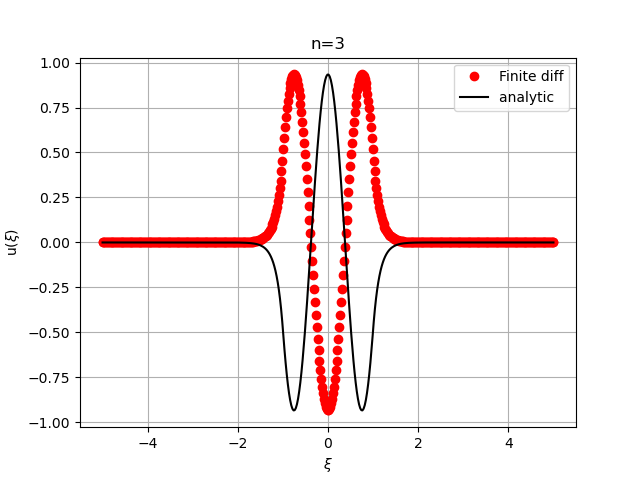

<IPython.core.display.Javascript object>


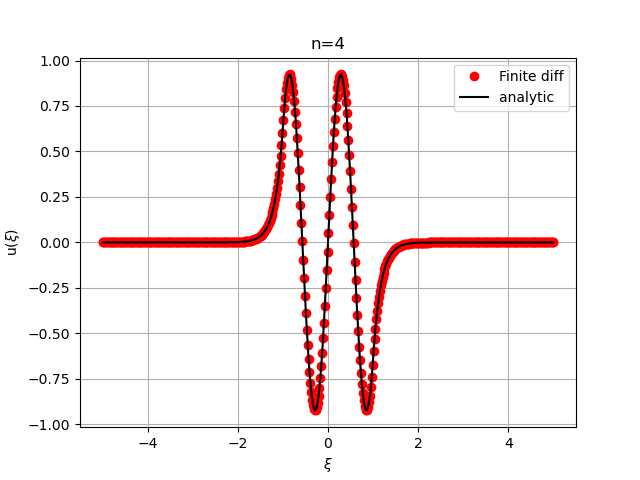

<IPython.core.display.Javascript object>


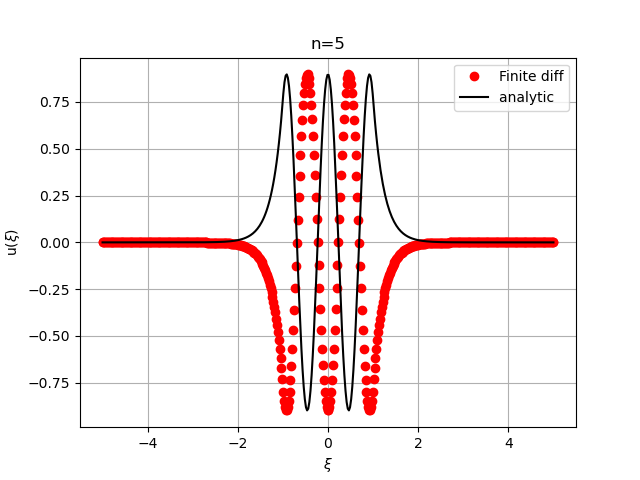

In [18]:
Fcn=[]

for i in range(5):
    plt.figure()
    OO=v[:,i] #choosing the i_th eigenvector
    Sol=normalization(OO)
    Fcn.append(Sol)
    tt0=np.linspace(a,b,n0)
    plt.plot(tt0,Sol,'o',label='Finite diff',c='r')
    plt.title('n='+str(i+1))
    plt.plot(xx,Analytic[i],'-',c='black',label='analytic ')
    plt.xlabel(r'$\xi$');plt.ylabel(r'u($ \xi $)')
    plt.grid();plt.legend()

In [14]:
#d
v0_1=4
E=lambda z: z**2-v0_1
# print(E(1.02))
def fnc(x,V):
    Le=[];Ri=[];X=[];Rest=[]
    for i in range(len(x)):
        if x[i]<-1:
            Le.append(V[i]**2)
            X.append(x[i])
        elif x[i]>1:
            Ri.append(V[i]**2)
            X.append(x[i])
        else:
            Rest.append(V[i]**2)
    return X,Le,Ri,Rest
U1=fnc(x,Fcn[0])[1]
U2=fnc(x,Fcn[0])[2]
print('The probability of finding the particle in classically forbidden region: ')
Ans=(simp(U1,a,-1)+simp(U2,1,b) )
print(Ans)

The probability of finding the particle in classically forbidden region: 
0.0033941403552984863
